In [1]:
import rebound
import reboundx
from celmech import Andoyer
import numpy as np
import sys
import time
%matplotlib inline
import matplotlib.pyplot as plt
from rundampresonant import damp

In [63]:
def makesim(jk=(3,1), taue=1.e4, rebxintegrator='rk4'): # taue = None = no damp, jk = None returns single planet
    if jk:
        avars = Andoyer.from_elements(j=jk[0], k=jk[1], Zstar=0.1, libfac=0.2, m1=1.e-4, m2=1.e-4)
        sim = avars.to_Simulation()
    else:
        sim = rebound.Simulation()
        sim.add(m=1.)
        sim.add(m=1.e-4, a=1., e=0.01)
        sim.add(m=1.e-4, a=3., e=0.01)
        sim.move_to_com()
        
    sim.integrator='whfast'
    sim.dt = sim.particles[1].P/100.
    return sim
    
def run(tmax, jk=(3,1), taue=1.e4, rebxintegrator="", dtfactor=0.01):   
    simWH = makesim(jk, taue, rebxintegrator)
    ps = simWH.particles
    simWH.integrator="whfast"
    simWH.dt = dtfactor*ps[1].P
    
    if taue:
        rebxWH = reboundx.Extras(simWH)
        integforce = rebxWH.load_operator("integrate_force")
        rebxWH.add_operator(integforce, dt_fraction=1., timing="post")

        modWH = rebxWH.load_force("modify_orbits_forces")
        integforce.params['force'] = modWH
        integforce.params['integrator'] = reboundx.integrators[rebxintegrator]
        
        for p in ps[1:]:
            p.params['tau_e'] = -taue*ps[1].P
        ps[1].params['tau_a'] = taue*ps[1].P*100

     
    Nout = 10000
    times = np.linspace(0, tmax*ps[1].P, Nout)
    ksWH, t = np.zeros(Nout), np.zeros(Nout)
    
    for i, time in enumerate(times):
        simWH.integrate(time, exact_finish_time=0)
        t[i] = simWH.t
        ksWH[i] = ps[1].e*np.cos(ps[1].pomega)
       
    sim = makesim(jk, taue, rebxintegrator)
    sim.integrator="ias15"
    ps = sim.particles
    ks = np.zeros(Nout)
    
    if taue:
        rebx = reboundx.Extras(sim)
        mod = rebx.load_force("modify_orbits_forces")
        rebx.add_force(mod)

        for p in ps[1:]:
            p.params['tau_e'] = -taue*ps[1].P
        ps[1].params['tau_a'] = taue*ps[1].P*100
        
    for i, time in enumerate(t): 
        sim.integrate(time)
        ks[i] = ps[1].e*np.cos(ps[1].pomega)
        
    return t, ks, ksWH, times

In [ ]:
%%time
t, ks, ksWH, times = run(tmax=1.e7, jk=None, taue=None, rebxintegrator='rk4')

Text(0.5, 1.0, 'Absolute $\\varpi err$')

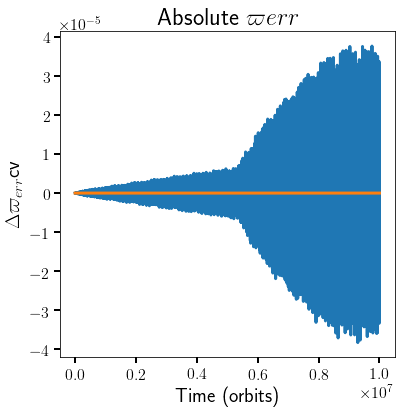

In [66]:
try:
    plt.style.use('paper')
except:
    print("style not found")

fig, ax = plt.subplots()
plt.rcParams["text.usetex"] =True
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax.plot(t/2/np.pi, ks-ksWH)
ax.plot(t/2/np.pi, [0]*len(t))
ax.set_xlabel('Time (orbits)')
ax.set_ylabel(r'$\Delta \varpi_{err}$cv')
ax.set_title(r'Absolute $\varpi err$')

In [ ]:
%%time
t, ks, ksWH, times = run(tmax=1.e7, jk=None, taue=1.e4, rebxintegrator='rk4')

In [ ]:
try:
    plt.style.use('paper')
except:
    print("style not found")

fig, ax = plt.subplots()
plt.rcParams["text.usetex"] =True
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax.plot(t/2/np.pi, ks-ksWH)
ax.plot(t/2/np.pi, [0]*len(t))
ax.set_xlabel('Time (orbits)')
ax.set_ylabel(r'$\Delta \varpi_{err}$cv')
ax.set_title(r'Absolute $\varpi err$')

Text(0.5, 1.0, 'Absolute $\\varpi err$')

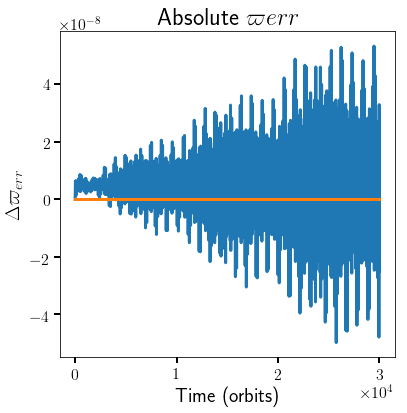

In [56]:
try:
    plt.style.use('paper')
except:
    print("style not found")

fig, ax = plt.subplots()
plt.rcParams["text.usetex"] =True
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax.plot(t/2/np.pi, ks-ksWH)
ax.plot(t/2/np.pi, [0]*len(t))
ax.set_xlabel('Time (orbits)')
ax.set_ylabel(r'$\Delta \varpi_{err}$cv')
ax.set_title(r'Absolute $\varpi err$')

Text(0.5, 1.0, 'Absolute $\\varpi err$')

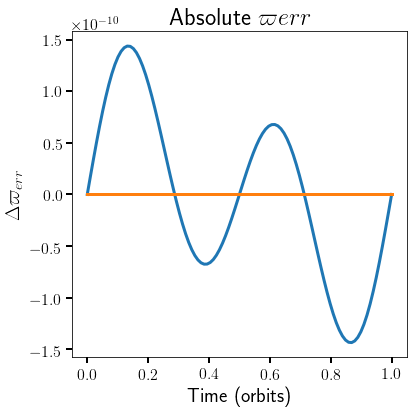

In [21]:
try:
    plt.style.use('paper')
except:
    print("style not found")

fig, ax = plt.subplots()
plt.rcParams["text.usetex"] =True
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax.plot(t/2/np.pi, ks-ksWH)
ax.plot(t/2/np.pi, [0]*len(t))
ax.set_xlabel('Time (orbits)')
ax.set_ylabel(r'$\Delta \varpi_{err}$')
ax.set_title(r'Absolute $\varpi err$')

In [7]:
(ks-ksWH)[-1]

1.7082998210460332e-11

In [34]:
times

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [27]:
pomegas-pomegasWH

array([ 0.        , -0.03141607, -0.03141613, -0.0314162 , -0.03141626,
       -0.03141632, -0.03141637, -0.03141641, -0.03141644, -0.03141647,
       -0.0314165 , -0.03141652, -0.03141654, -0.03141655, -0.03141657,
       -0.03141657, -0.03141658, -0.03141659, -0.03141659, -0.03141659,
       -0.0314166 , -0.0314166 , -0.0314166 , -0.03141659, -0.03141659,
       -0.03141659, -0.03141658, -0.03141658, -0.03141658, -0.03141658,
       -0.03141657, -0.03141657, -0.03141656, -0.03141656, -0.03141655,
       -0.03141655, -0.03141655, -0.03141654, -0.03141654, -0.03141653,
       -0.03141653, -0.03141652, -0.03141652, -0.03141651, -0.03141651,
       -0.0314165 , -0.0314165 , -0.03141649, -0.03141649, -0.03141648,
       -0.03141648, -0.03141647, -0.03141647, -0.03141646, -0.03141645,
       -0.03141645, -0.03141644, -0.03141644, -0.03141643, -0.03141642,
       -0.03141642, -0.03141641, -0.0314164 , -0.0314164 , -0.03141639,
       -0.03141638, -0.03141638, -0.03141637, -0.03141636, -0.03

In [41]:
pomegasWH

array([ 0.        ,  0.15705744,  0.25130774,  0.34555881,  0.43981034,
        0.53406215,  0.62831412,  0.72256619,  0.81681831,  0.91107045,
        1.00532258,  1.09957469,  1.19382675,  1.28807875,  1.38233071,
        1.47658263,  1.57083454,  1.6650865 ,  1.75933858,  1.85359087,
        1.94784351,  2.04209669,  2.13635063,  2.23060565,  2.32486221,
        2.41912096,  2.51338287,  2.60764958,  2.70192392,  2.79621155,
        2.8905256 ,  2.98490532,  3.07954682,  0.06048213,  0.15649789,
        0.2510006 ,  0.34535237,  0.43965793,  0.53394344,  0.62821853,
        0.72248755,  0.81675273,  0.91101535,  1.00527618,  1.09953571,
        1.19379426,  1.28805208,  1.38230936,  1.47656624,  1.57082288,
        1.66507941,  1.75933602,  1.85359288,  1.94785024,  2.04210837,
        2.13636766,  2.2306286 ,  2.32489189,  2.41915853,  2.51343008,
        2.60770903,  2.70199987,  2.79631148,  2.89066449,  2.98512067,
        3.07998864, -1.6659159 ,  0.15615497,  0.25080389,  0.34

In [42]:
pomegas

array([ 0.        ,  0.12564124,  0.21989138,  0.31414234,  0.4083938 ,
        0.50264557,  0.59689753,  0.69114959,  0.78540172,  0.87965387,
        0.97390601,  1.06815813,  1.1624102 ,  1.25666222,  1.35091419,
        1.44516612,  1.53941805,  1.63367003,  1.72792212,  1.82217443,
        1.91642709,  2.01068028,  2.10493424,  2.19918929,  2.29344588,
        2.38770466,  2.48196661,  2.57623337,  2.67050778,  2.76479551,
        2.85910972,  2.95348976,  3.0481322 ,  0.02906005,  0.12507999,
        0.2195833 ,  0.31393532,  0.40824101,  0.50252661,  0.59680176,
        0.69107081,  0.78533603,  0.87959868,  0.97385953,  1.06811907,
        1.16237764,  1.25663548,  1.35089277,  1.44514966,  1.53940631,
        1.63366286,  1.72791948,  1.82217636,  1.91643373,  2.01069188,
        2.10495119,  2.19921215,  2.29347547,  2.38774214,  2.48201372,
        2.57629272,  2.67058363,  2.76489533,  2.85924849,  2.95370496,
        3.04857383, -1.69278292,  0.12473707,  0.21938656,  0.31